In [113]:
import pandas as pd

In [114]:
data = pd.read_csv('data/wine_cleared.csv')

In [115]:
# Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина
# для удобства сразу преобразуем признак в int

data['price_round'] = data['price'].round().astype(int)

In [116]:
 # Выполните код для нахождения года вина при помощи регулярного выражения
 # при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. 
 # Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [117]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


In [118]:
# В наборе данных винных обзоров самая популярная страна-производитель вина — США. 
# Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.
# Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [119]:
data.describe(include=['object'])

,country,description,designation,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year
count,129908,129971,129971,129908,129971,129971,129971,129971,129970,129971,125362
unique,43,119955,37980,425,1230,20,16,118840,707,16757,91
top,US,"Seductively tart in lemon pith, cranberry and ...",unknown,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,2013
freq,54504,3,37465,36247,21247,26244,31213,11,13272,222,15853


In [120]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [121]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [122]:
data['is_italy'].sum()

19540

In [123]:
# Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
data['year'] = data['year'].astype('Int64')
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)


In [124]:
data['old_wine'].sum()

39781

In [125]:
 # Выполните код для нахождения года вина при помощи регулярного выражения
 # при поиске числа методом data['title'].str.findall(regex) результатом выполнения является список найденных цифр. 
 # Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.
regex = r'\((.*?)\)' # Регулярное выражение для извлечения слова в скобках
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [126]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley


In [127]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [128]:
# Далее сопоставим значения из датасета country_population и страной-производителем вина. 
# На основе значений населения из country_population заполним новый признак country_population.
# Используем для этого функцию для объединения датасетов join. 
# Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

data = data.join(country_population.set_index('country'), on='country')

In [129]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [130]:
data = data.join(country_area.set_index('country'), on='country')

In [131]:
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

Давайте рассмотрим, из каких признаков состоит срез данных:

client_id — идентификатор клиента в базе;

agent_date — время соединения с агентом;

created_at — время соединения с клиентом (начало разговора);

end_date — время окончания соединения с клиентом (конец разговора).

Прочитаем данные:

In [132]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [133]:
# Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 
# Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.
# Таким образом мы получили новый признак duration — длительность разговора в секундах.
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [134]:
# Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection

calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls


,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [135]:
# Создайте новый признак is_connection — факт соединения с клиентом. 
# Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


In [136]:
# Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection,time_diff
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0,6
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1,233
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0,9
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1,216
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1,100
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1,94
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1,95
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0,72


In [137]:
calls['time_diff'].sum()

1144

In [138]:
# Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. 
# После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны 
# — передать на вход модели мы им не сможем, 
# так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их

calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [139]:
# Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. 
# За дату отсчёта возьмите 12 января 2022 года.
# В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа

data['year'] = data['year'].astype('Int64').astype(str)

# Преобразует столбец year в формат datetime, используя pd.to_datetime() с форматом '%Y' и параметром errors='coerce'
data['year'] = pd.to_datetime(data['year'], format='%Y', errors='coerce')

# Установка даты отсчета
reference_date = pd.to_datetime('2022-01-12')

# Вычисление разницы в днях
data['years_diff'] = (reference_date - data['year']).dt.days

# Найти максимальное количество дней
max_days = data['years_diff'].max()
print(round(max_days))


98627


In [140]:
import category_encoders as ce

In [141]:
# Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, 
# где size — буквенное обозначение размера одежды, type — тип изделия.

# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [142]:
# Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. 
# По умолчанию все строковые столбцы будут закодированы.

# Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. 
# Затем используем метод concat() для добавления закодированного признака в датафрейм data.

# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [143]:
# Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. 
# Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [144]:
# На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. 
# По умолчанию кодирование выполняется для всех столбцов типа object:
# Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными

clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


In [145]:
# В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. 
# Закодируйте его, используя One-Hot Encoding.
# В ответе напишите, сколько признаков добавилось после применения кодирования.

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

type_bin


,taster_name_Kerin O’Keefe,taster_name_Roger Voss,taster_name_Paul Gregutt,taster_name_Alexander Peartree,taster_name_Michael Schachner,taster_name_Anna Lee C. Iijima,taster_name_Virginie Boone,taster_name_Matt Kettmann,taster_name_unknown,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129968,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129969,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
# Вернёмся к примеру с магазином одежды. 
# Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [147]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

type_bin

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


In [148]:
data['taster_twitter_handle'].unique()

array(['@kerinokeefe', '@vossroger', '@paulgwine\xa0', 'unknown',
       '@wineschach', '@vboone', '@mattkettmann', '@wawinereport',
       '@gordone_cellars', '@JoeCz', '@AnneInVino', '@laurbuzz',
       '@worldwineguys', '@suskostrzewa', '@bkfiona', '@winewchristina'],
      dtype=object)

In [149]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

type_bin

,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129966,0,0,1,0,0
129967,0,0,0,1,1
129968,0,0,0,1,0
129969,0,0,0,1,0


In [150]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [151]:
encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)
df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


In [152]:
# ✏️ Попробуем на обучающем примере применить различные способы нормализации к распределениям и увидеть разницу между ними.
# Используем библиотеку numpy для создания массивов случайных чисел различных распределений. 
# Выполните этот код, чтобы создать обучающий набор различных распределений:

import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

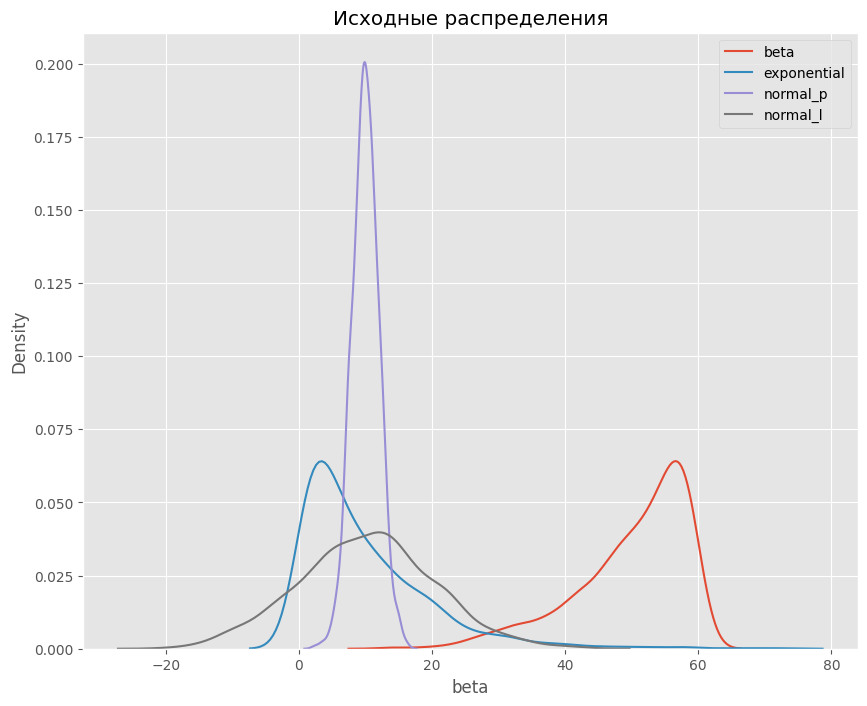

In [153]:
# Рассмотрим распределения на графике. 
# Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. 
# Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в руководстве.

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [154]:
# Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.
# Зафиксируем описательные статистики до преобразований.

df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

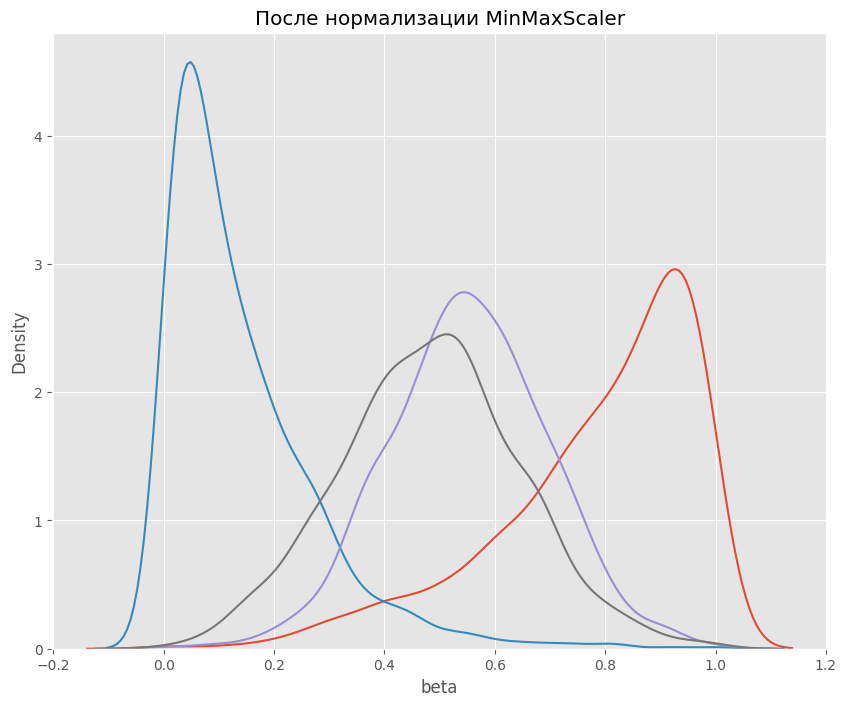

In [155]:
# Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform. 
# Вы познакомитесь с ней подробнее в модулях машинного обучения.

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

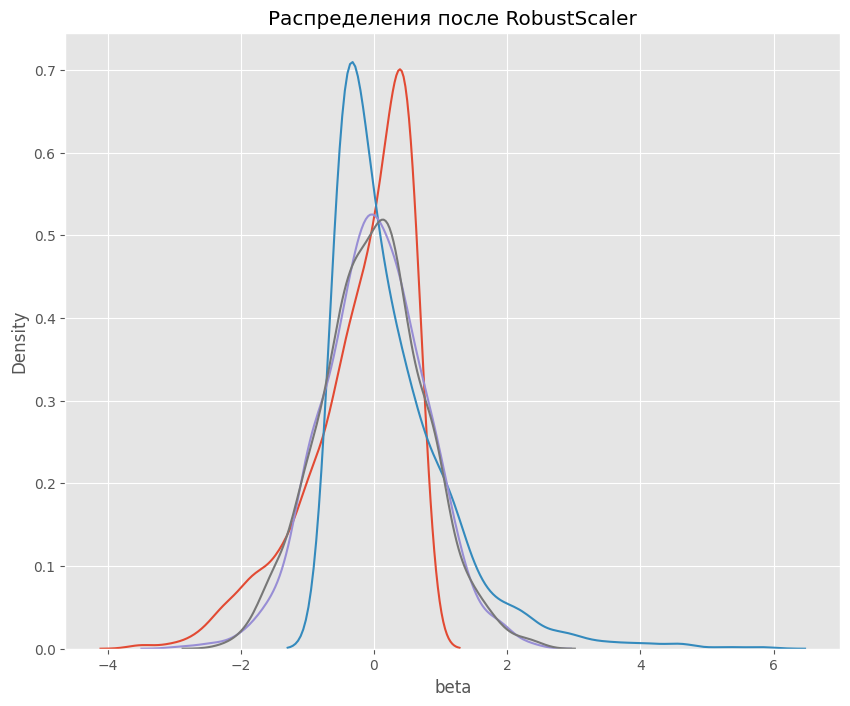

In [156]:
# Проведём нормализацию распределений признаков из обучающего примера, используя класс RobustScaler.

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)


<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

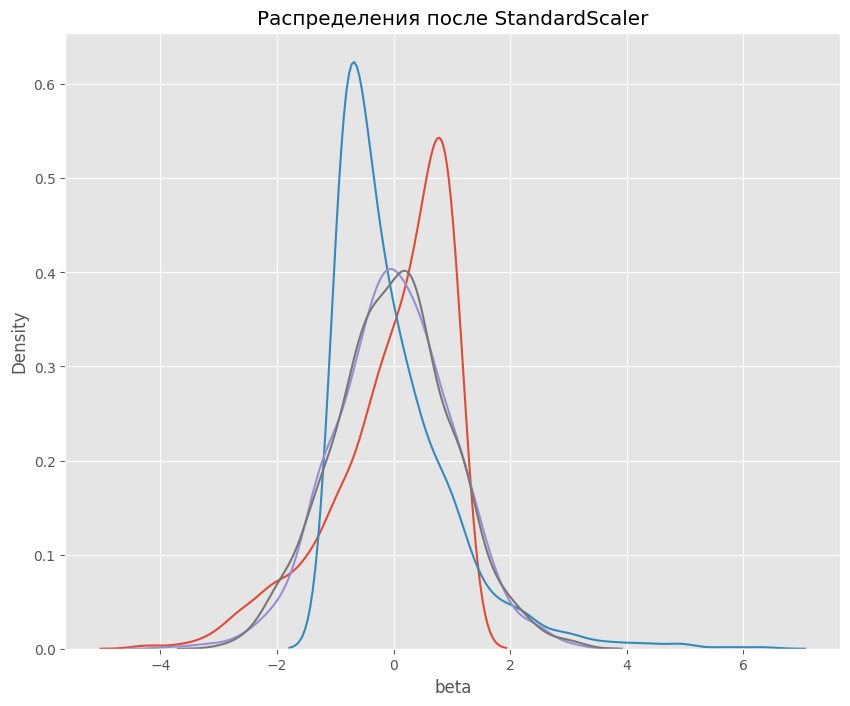

In [157]:
# Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. 
# Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.
# Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.
# Для стандартизации используем класс StandardScaler.

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)


In [158]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
data['normalized_price'] = r_scaler.fit_transform(data[['price']])
data['normalized_price'].sum()



43500.77493697044

In [159]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
data['s_price'] = s_scaler.fit_transform(data[['price']])
data['s_price'][129968]


-0.13551516993245472

In [160]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: >

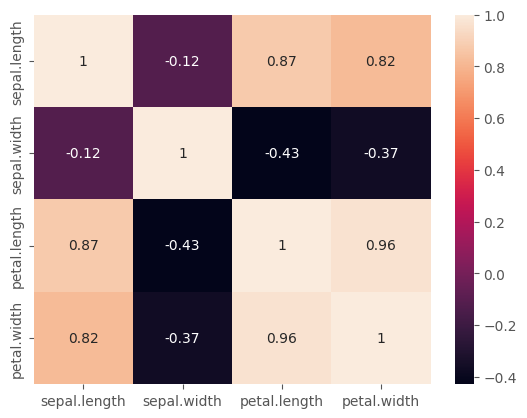

In [161]:
# Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [162]:
# Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. 
# Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:
iris = iris.drop(['petal.width'], axis=1)

# Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:
iris = iris.drop(['petal.length'], axis=1)

iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


In [163]:
data.corr(numeric_only=True)

,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine,area,years_diff,...,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4,normalized_price,s_price
Unnamed: 0,1.000000,0.007125,0.004648,0.004662,0.010928,-0.002187,-0.010178,-0.020735,0.011775,-0.016941,...,-0.001589,0.010799,0.001554,-0.001707,0.012235,-0.001283,-0.000425,0.003705,0.004648,0.004648
points,0.007125,1.000000,0.402136,0.402064,0.032592,0.059248,0.015926,-0.046295,0.023427,-0.034794,...,-0.019867,0.032218,0.059086,-0.001372,0.050516,-0.140644,0.183248,0.030899,0.402136,0.402136
price,0.004648,0.402136,1.000000,0.999997,0.025873,0.053139,0.039566,0.055555,0.021446,0.052737,...,0.002669,-0.016748,0.085679,-0.001035,-0.051194,-0.022783,0.058051,-0.056477,1.000000,1.000000
price_round,0.004662,0.402064,0.999997,1.000000,0.026379,0.052615,0.039314,0.055453,0.021984,0.052654,...,0.002364,-0.016294,0.085657,-0.001031,-0.051023,-0.022453,0.057807,-0.056189,0.999997,0.999997
is_usa,0.010928,0.032592,0.025873,0.026379,1.000000,-0.384584,-0.357477,-0.007533,0.966549,-0.004996,...,-0.542764,0.758877,0.412017,0.005700,0.012343,0.256748,0.000427,-0.042812,0.025873,0.025873
is_france,-0.002187,0.059248,0.053139,0.052615,-0.384584,1.000000,-0.190359,-0.082903,-0.398449,-0.066337,...,0.708566,-0.506781,0.219402,-0.003075,-0.030377,-0.424677,0.446008,-0.300874,0.053139,0.053139
is_italy,-0.010178,0.015926,0.039566,0.039314,-0.357477,-0.190359,1.000000,0.085629,-0.393994,0.081176,...,-0.268654,-0.471060,0.203938,-0.002858,-0.184386,-0.059161,-0.386531,0.142941,0.039566,0.039566
old_wine,-0.020735,-0.046295,0.055555,0.055453,-0.007533,-0.082903,0.085629,1.000000,0.007443,0.502450,...,-0.056079,-0.036394,0.030290,0.002859,-0.106577,0.197093,-0.160151,-0.169606,0.055555,0.055555
area,0.011775,0.023427,0.021446,0.021984,0.966549,-0.398449,-0.393994,0.007443,1.000000,0.002229,...,-0.534240,0.742531,0.434768,0.007288,0.063930,0.255088,0.011283,-0.042326,0.021446,0.021446
years_diff,-0.016941,-0.034794,0.052737,0.052654,-0.004996,-0.066337,0.081176,0.502450,0.002229,1.000000,...,-0.049160,-0.034974,0.025414,0.004775,-0.080616,0.129206,-0.126545,-0.105690,0.052737,0.052737


In [164]:
import plotly.express as px

# Загружаем набор данных iris

# Вычисляем корреляционную матрицу
corr_matrix = data.corr(numeric_only=True)

# Создаем тепловую карту
fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto",
                color_continuous_scale='RdBu_r',
                labels=dict(color="Correlation"),
                title="Correlation Heatmap")

fig.show()

<Axes: >

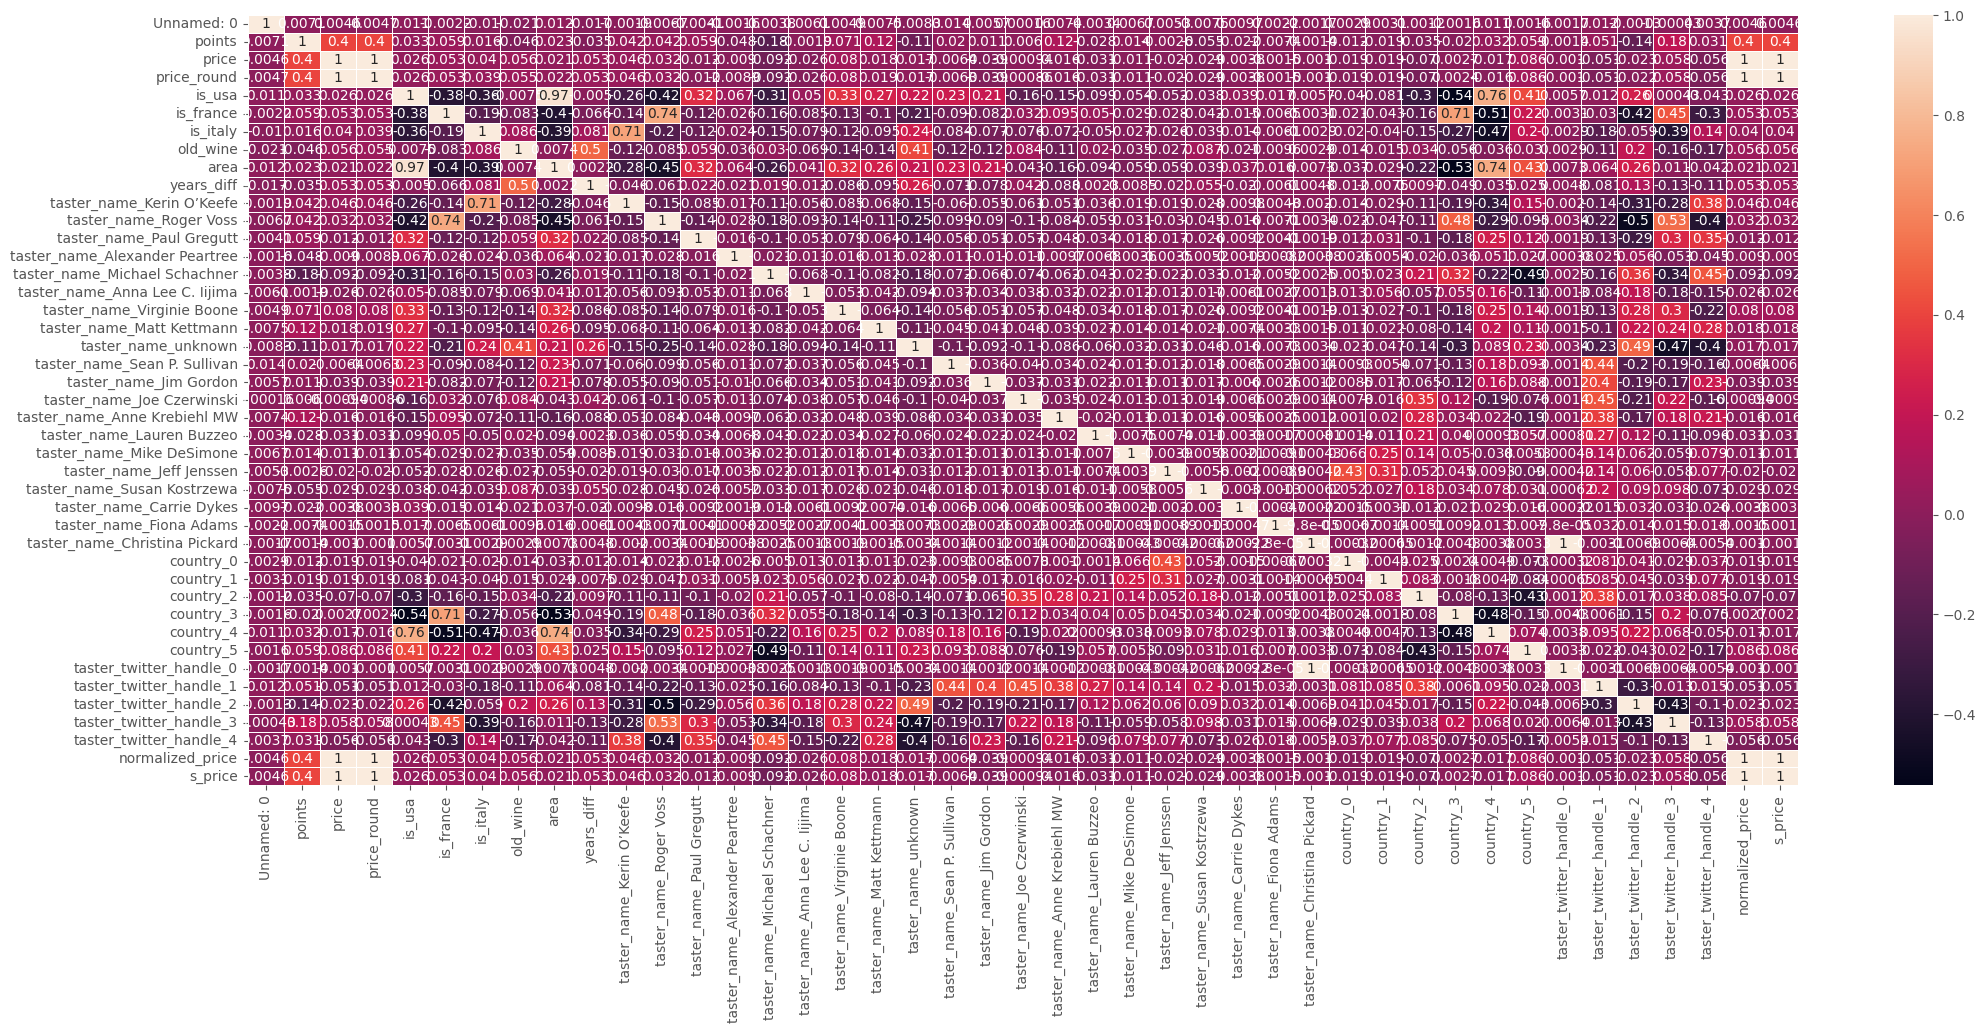

In [165]:
# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

In [166]:
# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

<Axes: >

<Axes: >

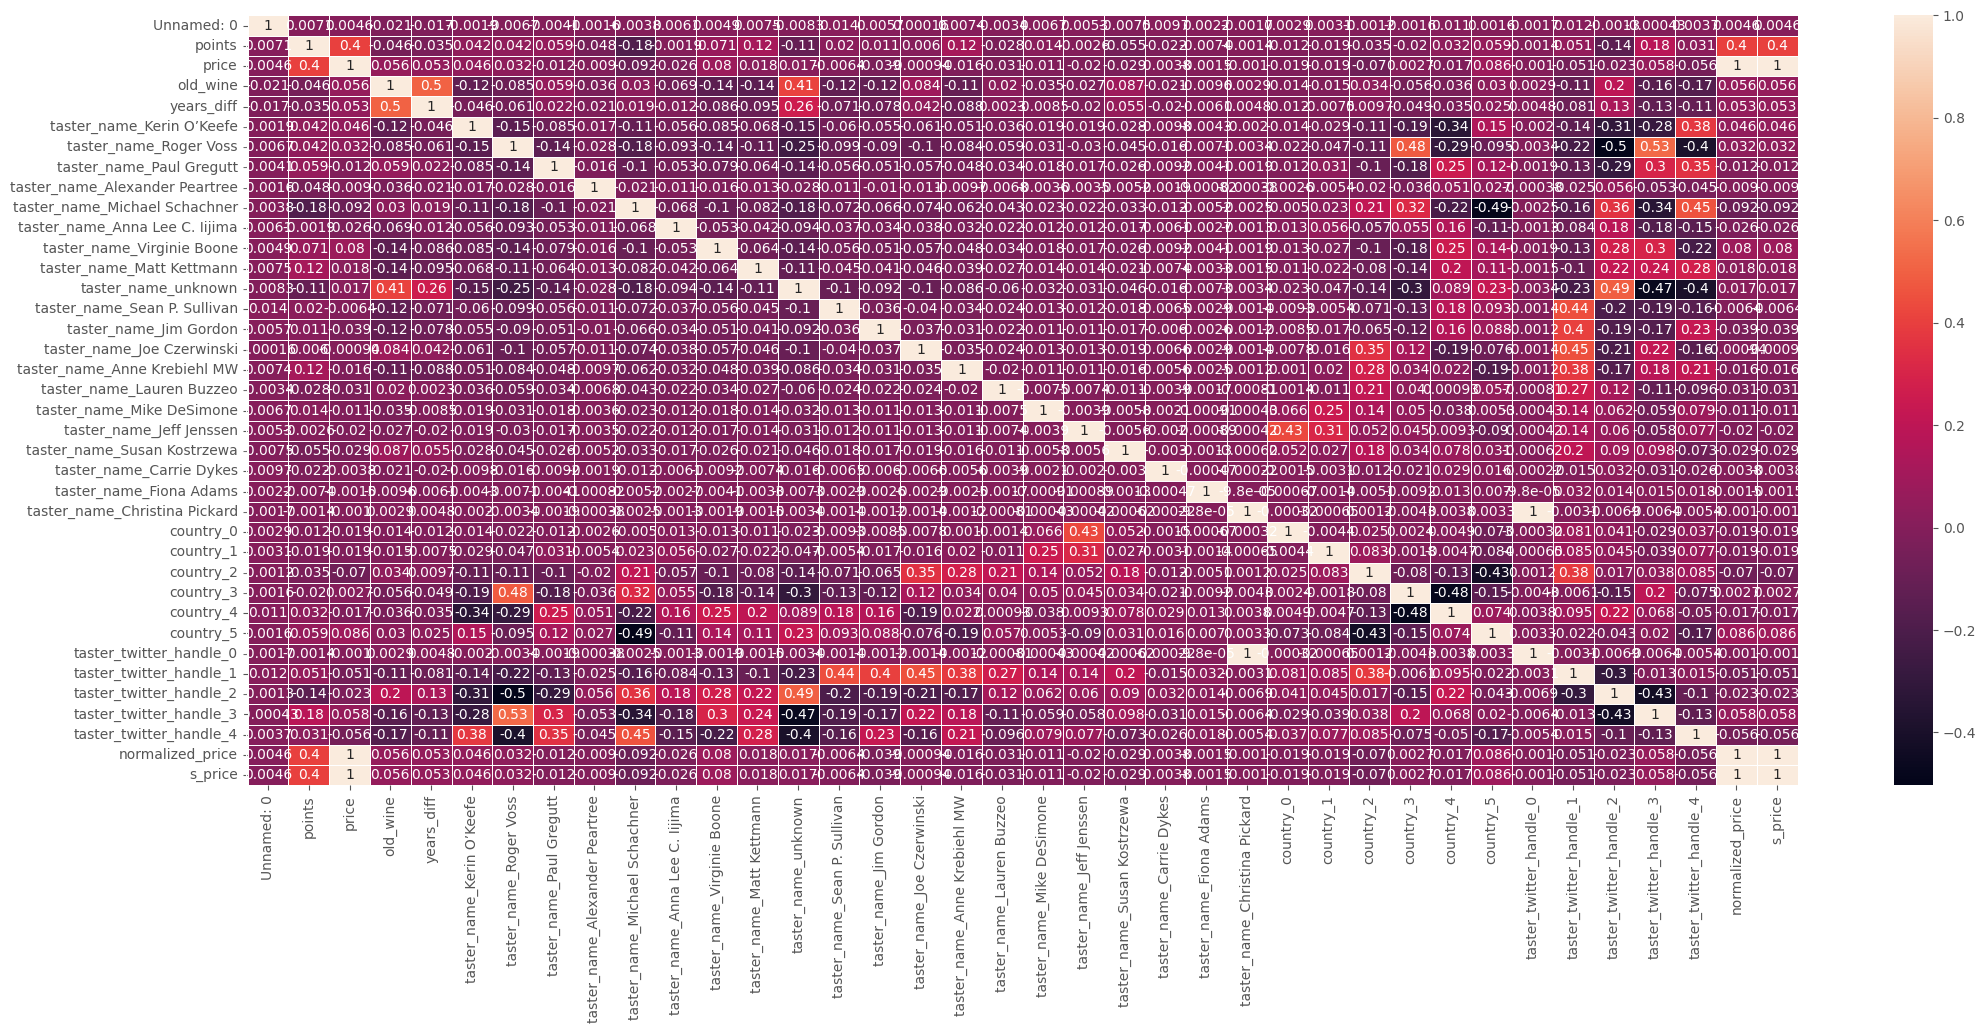

In [168]:
# Проверяем, что сильно скоррелированных признаков не осталось
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)